# GPT Example Increase Figure
Plots of how adding more examples affects GPT manually-engineered stepwise prompt performance across various datasets.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.transforms as transforms
from matplotlib.lines import Line2D
%matplotlib inline
from collections import defaultdict
from ast import literal_eval

In [7]:
# Read in the data
perf_files = {
    'pick_0_wr': 'pickle_no_examples_pickle_DEV_abstracts_09May2023_gpt-3.5-turbo_sequentrial_preds_pickle_DEV_per_doc_triples_10May2023_with_relation_labels_performance.csv',
    'pick_0_wor': 'pickle_no_examples_pickle_DEV_abstracts_09May2023_gpt-3.5-turbo_sequentrial_preds_pickle_DEV_per_doc_triples_10May2023_withOUT_relation_labels_performance.csv',
    'pick_2_wr': 'pickle_2_examples_few_shot_pickle_DEV_abstracts_09May2023_gpt-3.5-turbo_sequentrial_preds_pickle_DEV_per_doc_triples_10May2023_with_relation_labels_performance.csv',
    'pick_2_wor': 'pickle_2_examples_few_shot_pickle_DEV_abstracts_09May2023_gpt-3.5-turbo_sequentrial_preds_pickle_DEV_per_doc_triples_10May2023_withOUT_relation_labels_performance.csv',
    'pick_5_wr': 'pickle_5_examples_few_shot_pickle_DEV_abstracts_09May2023_gpt-3.5-turbo_sequentrial_preds_pickle_DEV_per_doc_triples_10May2023_with_relation_labels_performance.csv',
    'pick_5_wor': 'pickle_5_examples_few_shot_pickle_DEV_abstracts_09May2023_gpt-3.5-turbo_sequentrial_preds_pickle_DEV_per_doc_triples_10May2023_withOUT_relation_labels_performance.csv',
    'pick_10_wr': 'pickle_10_examples_few_shot_pickle_DEV_abstracts_09May2023_gpt-3.5-turbo_sequentrial_preds_pickle_DEV_per_doc_triples_10May2023_with_relation_labels_performance.csv',
    'pick_10_wor': 'pickle_10_examples_few_shot_pickle_DEV_abstracts_09May2023_gpt-3.5-turbo_sequentrial_preds_pickle_DEV_per_doc_triples_10May2023_withOUT_relation_labels_performance.csv'
}
perf_fullpath = '../data/baselines/all_benchmark_new_eval/case_intensitive_pickle_evals'

In [8]:
perf_dfs = {k: pd.read_csv(f'{perf_fullpath}/{v}') for k,v in perf_files.items()}

In [9]:
perf_dfs['pick_5_wr']

,precision,precision_CI,recall,recall_CI,F1,F1_CI
0,0.025806,"(0.007631118881118882, 0.04042857142857141)",0.063448,"(0.017857142857142856, 0.11221174004192867)",0.036425,"(0.010775335775335775, 0.058468934911242575)"


In [10]:
perf_dfs['pick_10_wr']

,precision,precision_CI,recall,recall_CI,F1,F1_CI
0,0.02806,"(0.00878441076399629, 0.050551298091961204)",0.07652,"(0.025142540386442827, 0.13977906976744187)",0.04077,"(0.012428494124922699, 0.07108585858585856)"


In [11]:
# Create combined performance df
perf_dict = defaultdict(list)
for name, df in perf_dfs.items():
    perf_dict['name'].append(name)
    perf_dict['F1'].append(df.loc[0, 'F1'])
    perf_dict['F1_CI'].append(df.loc[0, 'F1_CI'])
perfs_to_plot = pd.DataFrame.from_dict(perf_dict)

In [12]:
# Cast the CI column to two, one upper bound and one lower bound
tuple_col = perfs_to_plot['F1_CI'].apply(lambda x: literal_eval(x))
lower_bound = [t[0] for t in tuple_col]
upper_bound = [t[1] for t in tuple_col]
perfs_to_plot['lower_bound'] = lower_bound
perfs_to_plot['upper_bound'] = upper_bound

In [13]:
# Create a common name for the X-axis
perfs_to_plot['common_name'] = perfs_to_plot['name'].str.split('_').str[1:2].str.join('_')

In [14]:
# Add full dataset name
full_names = {'pick': 'PICKLE',
             'cdr': 'CDR',
             'bioinfer': 'BioInfer',
             'scierc': 'SciERC'}
perfs_to_plot['full_dset_name'] = [full_names[s.split('_')[0]] for s in perfs_to_plot['name']]

In [15]:
perfs_to_plot

,name,F1,F1_CI,lower_bound,upper_bound,common_name,full_dset_name
0,pick_0_wr,0.000000,"(0.0, 0.0)",0.000000,0.000000,0,PICKLE
1,pick_0_wor,0.011675,"(0.0, 0.025336538461538445)",0.000000,0.025337,0,PICKLE
2,pick_2_wr,0.019403,"(0.0028875379939209815, 0.033431098696461825)",0.002888,0.033431,2,PICKLE
3,pick_2_wor,0.039640,"(0.021059400444115473, 0.05970149253731344)",0.021059,0.059701,2,PICKLE
4,pick_5_wr,0.036425,"(0.010775335775335775, 0.058468934911242575)",0.010775,0.058469,5,PICKLE
5,pick_5_wor,0.082315,"(0.04066148754252091, 0.12086527929901422)",0.040661,0.120865,5,PICKLE
6,pick_10_wr,0.040770,"(0.012428494124922699, 0.07108585858585856)",0.012428,0.071086,10,PICKLE
7,pick_10_wor,0.073175,"(0.03667930889169828, 0.10705213903743316)",0.036679,0.107052,10,PICKLE


In [16]:
# Arrange data to plot
wr_df = perfs_to_plot[perfs_to_plot['name'].str.contains('wr')]
wor_df = perfs_to_plot[perfs_to_plot['name'].str.contains('wor')]

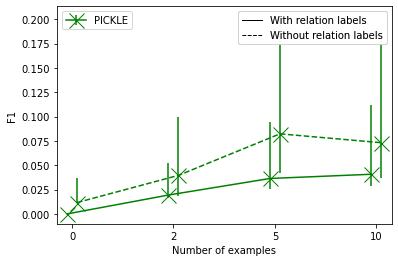

In [17]:
# Plot
fig, ax = plt.subplots()

offset = lambda p: transforms.ScaledTranslation(p/72.,0, plt.gcf().dpi_scale_trans)
trans = plt.gca().transData

for dset in perfs_to_plot['full_dset_name'].unique():
    dset_subset_wr = wr_df[wr_df['full_dset_name'] == dset]
    dset_subset_wor = wor_df[wor_df['full_dset_name'] == dset]
    ax.errorbar(dset_subset_wr['common_name'], dset_subset_wr['F1'],
                 [dset_subset_wr['lower_bound'],
                  dset_subset_wr['upper_bound']],
                 marker='x', ms=15, c='green', linestyle='solid',
                 transform=trans+offset(-5), label=dset)
    ax.errorbar(dset_subset_wor['common_name'], dset_subset_wor['F1'],
                 [dset_subset_wor['lower_bound'],
                  dset_subset_wor['upper_bound']],
                 marker='x', ms=15, c='green', linestyle='dashed',
                 transform=trans+offset(5), label=dset)
plt.xlabel('Number of examples')
plt.ylabel('F1')

# Keep only the solid line version of each model/training set combination
lines, labels = ax.get_legend_handles_labels()
keep_lines, keep_labs = [], []
for lin, lab in zip(lines, labels):
    if lab not in keep_labs:
        keep_labs.append(lab)
        keep_lines.append(lin)
legend1 = ax.legend(handles=keep_lines, loc='upper left')
# Dummy lines with NO entries, just to create the black style legend
dummy_lines = []
for linestyle, label in zip(['-', '--'],
                    ['With relation labels', 'Without relation labels']):
    dummy_lines.append(Line2D([0], [0], linestyle=linestyle, color='black',
                       linewidth=1, label=label))
legend2 = ax.legend(dummy_lines,
                    ['With relation labels', 'Without relation labels'])
ax.add_artist(legend1)
ax.add_artist(legend2)

Case sensitive numbers: 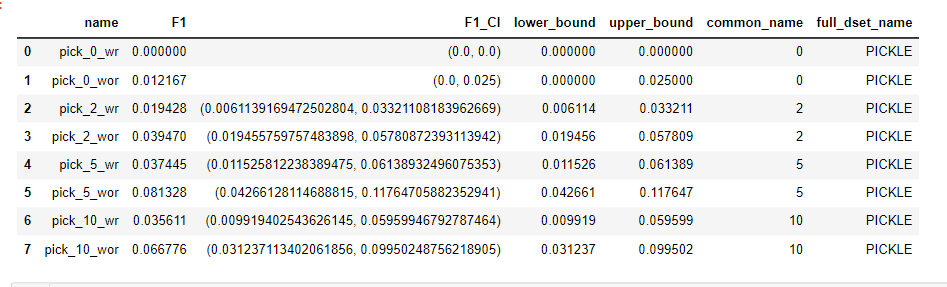

Case sensitive plot: 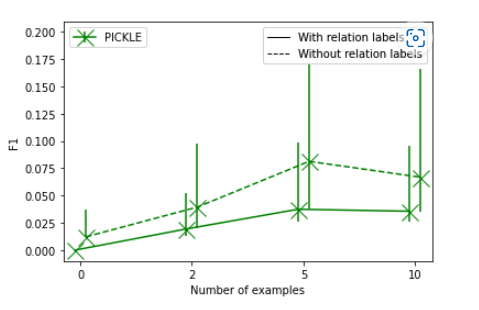